In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
tp_bound = 111994
predict_max_index = 185223

In [3]:
training_data_df = pd.read_csv('training_data.csv', index_col = [0])
predict_data_df = pd.read_csv('predict_data.csv', index_col = [0])

In [4]:
# rid of N/A values and 0 values and outliers???
training_data_df = training_data_df.dropna()
training_data_df = training_data_df.drop(training_data_df[training_data_df['Gender'] == '0'].index)
training_data_df = training_data_df.drop(training_data_df[training_data_df['University Degree'] == '0'].index)
training_data_df = training_data_df.drop(training_data_df[training_data_df['Hair Color'] == '0'].index)
training_data_df = training_data_df.drop(training_data_df[training_data_df['Income'] > 2000000].index)
training_data_df = training_data_df.drop(training_data_df[training_data_df['Income'] <= 0 ].index)
training_data_df = training_data_df.drop(training_data_df[training_data_df['Body Height [cm]'] < 100].index)
training_data_df = training_data_df.drop(training_data_df[training_data_df['Body Height [cm]'] > 250].index)

training_data_df.shape

(89048, 11)

In [5]:
(train_bound, col) = training_data_df.shape
training_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
Instance,,,,,,,,,,,
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
6,1991.0,male,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.99030
9,2015.0,male,43.0,South Sudan,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.20607


In [6]:
total_data_df = pd.concat([training_data_df, predict_data_df])
total_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
Instance,,,,,,,,,,,
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
6,1991.0,male,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.99030
9,2015.0,male,43.0,South Sudan,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.20607


In [7]:
# column N/A values
total_data_df.shape[0] - total_data_df.count()

Year of Record         295
Gender                4862
Age                    279
Country                  0
Size of City             0
Profession             195
University Degree     4857
Wears Glasses            0
Hair Color            4916
Body Height [cm]         0
Income               73230
dtype: int64

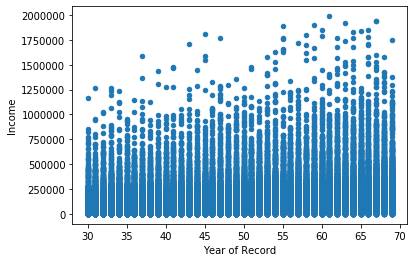

In [8]:
total_data_df['Year of Record'].fillna(2000, inplace = True)
total_data_df['Year of Record'] = total_data_df['Year of Record'].map(lambda year: year - 1950)

total_data_df[:tp_bound].plot.scatter(x='Year of Record', y = 'Income')

In [9]:
total_data_df['Gender'].fillna('unknown', inplace = True)
total_data_df['Gender'].replace('0', 'unknown', inplace = True)

total_data_df['Gender'].value_counts().sort_index()

female     40955
male       65017
other      40804
unknown    15502
Name: Gender, dtype: int64

In [10]:
gender_dummies = pd.get_dummies(total_data_df['Gender'], prefix = 'Gender')
total_data_df.drop('Gender', axis = 1, inplace = True)
total_data_df = total_data_df.join(gender_dummies)
total_data_df.drop('Gender_unknown', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income,Gender_female,Gender_male,Gender_other
Instance,,,,,,,,,,,,,
2,46.0,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764,0,0,1
3,68.0,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670,0,0,1
4,56.0,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793,0,0,1
6,41.0,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.99030,0,1,0
9,65.0,43.0,South Sudan,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.20607,0,1,0


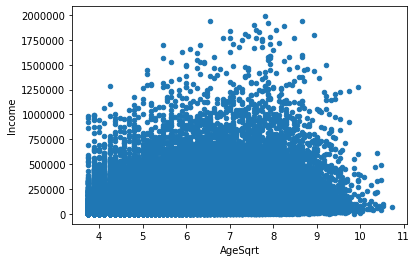

In [11]:
total_data_df['Age'].fillna(35, inplace=True)
total_data_df['AgeSqrt'] = total_data_df['Age'].map(lambda a: np.sqrt(a))
total_data_df.drop('Age', axis = 1, inplace = True)
total_data_df[:train_bound].plot.scatter(x='AgeSqrt', y = 'Income')

In [12]:
total_data_df['Country'].fillna('unknown', inplace = True)
dummies = pd.get_dummies(total_data_df['Country'], prefix = 'Country')
total_data_df.drop('Country', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)

total_data_df.head()

,Year of Record,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income,Gender_female,Gender_male,...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Yemen,Country_Zambia,Country_Zimbabwe
Instance,,,,,,,,,,,,,,,,,,,,,
2,46.0,1603504,safe event coordinator,Master,0,Black,186,91001.32764,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56.0,751903,fleet assistant,No,1,Black,171,45993.75793,0,0,...,0,0,0,0,0,0,0,0,0,0
6,41.0,56080,senior security analyst,Bachelor,0,Blond,181,125809.99030,0,1,...,0,0,0,0,0,0,0,0,0,0
9,65.0,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.20607,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:

total_data_df['SoC_8e6_1'] = total_data_df['Size of City'].map(lambda soc: soc if soc < 8e6 else 0)
total_data_df['SoC_8e6_2'] = total_data_df['Size of City'].map(lambda soc: soc if soc > 8e6 else 0)


In [14]:
total_data_df['SoC_8e6_1'] = total_data_df['Size of City'].map(lambda soc: soc if soc < 8e6 else 0)
total_data_df['SoC_8e6_2'] = total_data_df['Size of City'].map(lambda soc: soc if soc > 8e6 else 0)
total_data_df.drop('Size of City', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income,Gender_female,Gender_male,Gender_other,...,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Yemen,Country_Zambia,Country_Zimbabwe,SoC_8e6_1,SoC_8e6_2
Instance,,,,,,,,,,,,,,,,,,,,,
2,46.0,safe event coordinator,Master,0,Black,186,91001.32764,0,0,1,...,0,0,0,0,0,0,0,0,1603504,0
3,68.0,receivables/payables analyst,PhD,1,Brown,170,157982.17670,0,0,1,...,0,0,0,0,0,0,0,0,1298017,0
4,56.0,fleet assistant,No,1,Black,171,45993.75793,0,0,1,...,0,0,0,0,0,0,0,0,751903,0
6,41.0,senior security analyst,Bachelor,0,Blond,181,125809.99030,0,1,0,...,0,0,0,0,0,0,0,0,56080,0
9,65.0,intergovernmental outreach coordinator,No,0,Blond,189,48058.20607,0,1,0,...,0,0,0,0,0,0,0,0,85333,0


In [15]:
total_data_df['Profession'].fillna('unknown', inplace = True)
dummies = pd.get_dummies(total_data_df['Profession'], prefix = 'P')
total_data_df.drop('Profession', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)
total_data_df.drop('P_unknown', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income,Gender_female,Gender_male,Gender_other,AgeSqrt,...,P_windows administrator,P_wireless coordinator,P_woodworker,P_word processor,P_workforce management analyst,P_workforce planning intern,P_writer,P_x-ray technician,P_yardmaster,P_youth initiatives lead advisor
Instance,,,,,,,,,,,,,,,,,,,,,
2,46.0,Master,0,Black,186,91001.32764,0,0,1,6.403124,...,0,0,0,0,0,0,0,0,0,0
3,68.0,PhD,1,Brown,170,157982.17670,0,0,1,5.291503,...,0,0,0,0,0,0,0,0,0,0
4,56.0,No,1,Black,171,45993.75793,0,0,1,5.744563,...,0,0,0,0,0,0,0,0,0,0
6,41.0,Bachelor,0,Blond,181,125809.99030,0,1,0,7.745967,...,0,0,0,0,0,0,0,0,0,0
9,65.0,No,0,Blond,189,48058.20607,0,1,0,6.557439,...,0,0,0,0,0,0,0,0,0,0


In [16]:
total_data_df['University Degree'].fillna('unknown', inplace = True)
total_data_df['University Degree'].replace('0', 'unknown', inplace = True)
dummies = pd.get_dummies(total_data_df['University Degree'], prefix = 'UD')
total_data_df.drop('University Degree', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)
total_data_df.drop('UD_unknown', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Wears Glasses,Hair Color,Body Height [cm],Income,Gender_female,Gender_male,Gender_other,AgeSqrt,Country_Afghanistan,...,P_workforce management analyst,P_workforce planning intern,P_writer,P_x-ray technician,P_yardmaster,P_youth initiatives lead advisor,UD_Bachelor,UD_Master,UD_No,UD_PhD
Instance,,,,,,,,,,,,,,,,,,,,,
2,46.0,0,Black,186,91001.32764,0,0,1,6.403124,0,...,0,0,0,0,0,0,0,1,0,0
3,68.0,1,Brown,170,157982.17670,0,0,1,5.291503,0,...,0,0,0,0,0,0,0,0,0,1
4,56.0,1,Black,171,45993.75793,0,0,1,5.744563,0,...,0,0,0,0,0,0,0,0,1,0
6,41.0,0,Blond,181,125809.99030,0,1,0,7.745967,0,...,0,0,0,0,0,0,1,0,0,0
9,65.0,0,Blond,189,48058.20607,0,1,0,6.557439,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
dummies = pd.get_dummies(total_data_df['Wears Glasses'], prefix = 'WG')
total_data_df.drop('Wears Glasses', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)

total_data_df.head()

,Year of Record,Hair Color,Body Height [cm],Income,Gender_female,Gender_male,Gender_other,AgeSqrt,Country_Afghanistan,Country_Albania,...,P_writer,P_x-ray technician,P_yardmaster,P_youth initiatives lead advisor,UD_Bachelor,UD_Master,UD_No,UD_PhD,WG_0,WG_1
Instance,,,,,,,,,,,,,,,,,,,,,
2,46.0,Black,186,91001.32764,0,0,1,6.403124,0,0,...,0,0,0,0,0,1,0,0,1,0
3,68.0,Brown,170,157982.17670,0,0,1,5.291503,0,0,...,0,0,0,0,0,0,0,1,0,1
4,56.0,Black,171,45993.75793,0,0,1,5.744563,0,0,...,0,0,0,0,0,0,1,0,0,1
6,41.0,Blond,181,125809.99030,0,1,0,7.745967,0,0,...,0,0,0,0,1,0,0,0,1,0
9,65.0,Blond,189,48058.20607,0,1,0,6.557439,0,0,...,0,0,0,0,0,0,1,0,1,0


In [18]:
total_data_df['Hair Color'].fillna('unknown', inplace = True)
total_data_df['Hair Color'].replace('0', 'unknown', inplace = True)
dummies = pd.get_dummies(total_data_df['Hair Color'], prefix = 'HC')
total_data_df.drop('Hair Color', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)
total_data_df.drop('HC_unknown', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Body Height [cm],Income,Gender_female,Gender_male,Gender_other,AgeSqrt,Country_Afghanistan,Country_Albania,Country_Algeria,...,UD_Master,UD_No,UD_PhD,WG_0,WG_1,HC_Black,HC_Blond,HC_Brown,HC_Red,HC_Unknown
Instance,,,,,,,,,,,,,,,,,,,,,
2,46.0,186,91001.32764,0,0,1,6.403124,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,68.0,170,157982.17670,0,0,1,5.291503,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,56.0,171,45993.75793,0,0,1,5.744563,0,0,0,...,0,1,0,0,1,1,0,0,0,0
6,41.0,181,125809.99030,0,1,0,7.745967,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9,65.0,189,48058.20607,0,1,0,6.557439,0,0,0,...,0,1,0,1,0,0,1,0,0,0


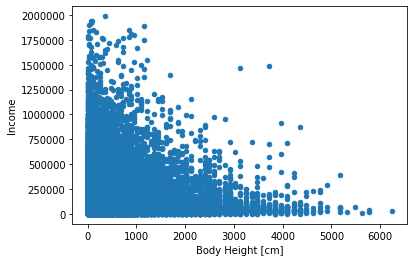

In [19]:
total_data_df['Body Height [cm]'] = total_data_df['Body Height [cm]'].map(lambda bh: (bh - 180)**2)
total_data_df[:train_bound].plot.scatter(x='Body Height [cm]', y = 'Income')

In [24]:
# training

total = total_data_df.drop('Income', axis = 1, inplace = False)
X = total[: train_bound]
y = total_data_df[: train_bound]['Income'].map(lambda y: np.cbrt(y))

linreg1 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

linreg1.fit(X_train, y_train)
linreg1.score(X_test, y_test)

0.8741674679578819

In [25]:
x = total[train_bound: ]
y = linreg1.predict(x)

In [26]:
income_series = pd.Series(y, name = 'Income')
instance_series = pd.Series(np.arange(tp_bound, predict_max_index + 1), name = 'Instance')
result = pd.concat([instance_series, income_series], axis = 1)
result['Income'] = result['Income'].map(lambda y: y**3)
result.to_csv('result-3.csv', index = False)